In [45]:
import numpy as np
import matplotlib.pyplot as plt

In [288]:
sims = 10000
years = 30
StartAUM = 1000000
bankruptcy = np.empty(sims)
finalAUM = np.empty(sims)
manager_profit = np.empty(sims)
chance = 18/38
yearly_fee = 0.01
performance_fee = 0.10
for i in range(sims):
    AUM = StartAUM
    profit = 0
    performance = 0
    #start the loop, which will be done yearly
    for a in range(years):
        #shift management fee from AUM to profits
        profit += (AUM * yearly_fee)
        AUM -= (AUM * yearly_fee)
        #calcculate the yearly stakes
        stakes = AUM * 0.1
        #These two help variables together always show the AUM at the end of the year if won
        first_AUM = AUM 
        first_stakes = AUM * 0.1 
        win = 0
        while win == 0 and AUM > 0:
            if np.random.binomial(1, chance, 1) == 1:
                win = 1
                AUM = first_AUM + first_stakes #calculate AUM if won
                performance += (first_stakes * performance_fee) #shift performance fee towards profits
                AUM -= (first_stakes * performance_fee) #doesnt make sense to reduce cumulative performance fee
            else:
                AUM -= stakes
                if (AUM - stakes * 2) > 0:
                    stakes = stakes * 2
                else:
                    stakes = AUM
        #while loop ends because AUM = 0
        if AUM == 0:
            break
    if AUM == 0:
        bankruptcy[i] = a #went bankrupt after surviving a years
    else: 
        bankruptcy[i] = a+1 #equivalent to surviving all years
    
    finalAUM[i] = AUM
    manager_profit[i] = profit + performance

In [289]:
#Expected manager profit
np.mean(manager_profit)

551314.3069535963

In [290]:
#Maximum manager profit
max(manager_profit)

2217455.4194750884

In [291]:
#Expected client win / loss
np.mean(finalAUM) - StartAUM

-111823.34205611073

In [292]:
#Risk of going bankrupt
1- (np.sum(bankruptcy == 30)/sims)

0.9095

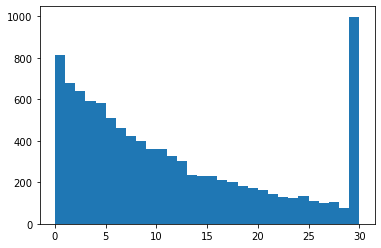

In [293]:
plt.hist(bankruptcy, bins = 30);